<a href="https://colab.research.google.com/github/11adi/DeepLearning/blob/main/Fashion_minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Minist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been split in test and train sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Dhow the first training sample
print(f"Trining Sample: \n {train_data[0]}\n")
print(f"Training Labels:\n {train_labels[0]}\n")

Trining Sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [3]:
# check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

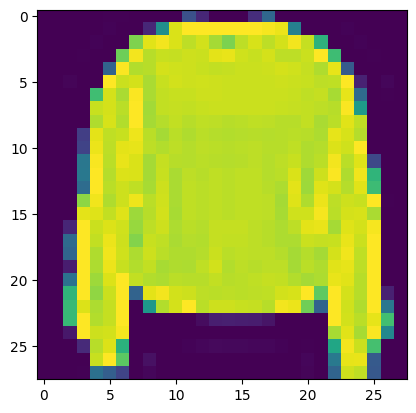

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [5]:
# Check out sample label
train_labels[7]

2

In [6]:
# Create a small list so we can index onto our training labels so that they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

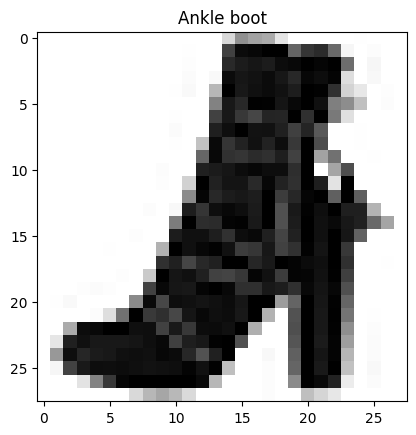

In [7]:
# Plot an example image and its label
index_of_choice = 11
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

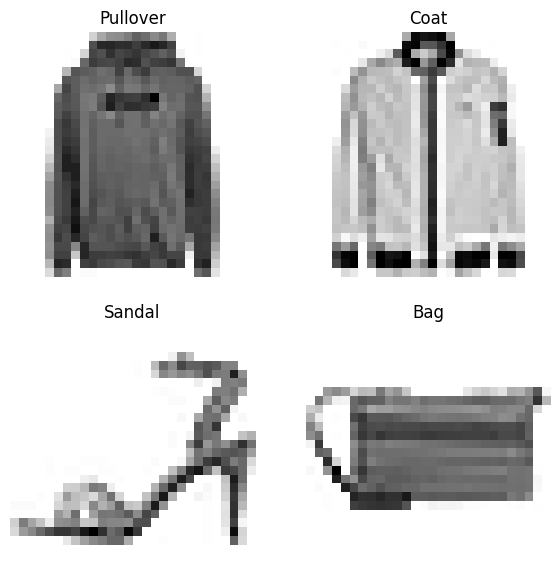

In [8]:
# Plot multiple random images of foshion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multiclass classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, however we're going to have to tweak a few things:

* Input Shape - 28 x 28 (the shape of one image)
* Output shape - 10 (one per class of clothing)
* Loss function - tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [9]:
train_data[0].shape


(28, 28)

In [10]:
len(class_names)

10

In [11]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [12]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3899 - accuracy: 0.0987 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3024 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3025 - val_accuracy:

In [13]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Check tjhe min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [16]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Now check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [17]:
test_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [18]:
# Now our data is normalized, let's build a model to find pattern in it

tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="Adam",
                 metrics=["accuracy"])

history_12 = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3944 - accuracy: 0.4707 - val_loss: 1.0505 - val_accuracy: 0.5976
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8786 - accuracy: 0.6956 - val_loss: 0.8024 - val_accuracy: 0.7235
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7460 - accuracy: 0.7349 - val_loss: 0.7567 - val_accuracy: 0.7289
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7053 - accuracy: 0.7424 - val_loss: 0.7201 - val_accuracy: 0.7356
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6860 - accuracy: 0.7494 - val_loss: 0.7058 - val_accuracy: 0.7459
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6722 - accuracy: 0.7556 - val_loss: 0.7010 - val_accuracy: 0.7490
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6616 - accuracy: 0.7623 - val_loss: 0.7221 - val_accuracy:

In [19]:
model_12.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 901us/step - loss: 0.6683 - accuracy: 0.7624


[0.6682714819908142, 0.7623999714851379]

<Axes: title={'center': 'normalized data'}>

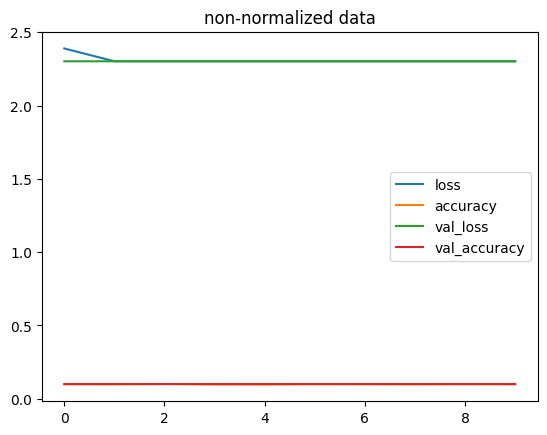

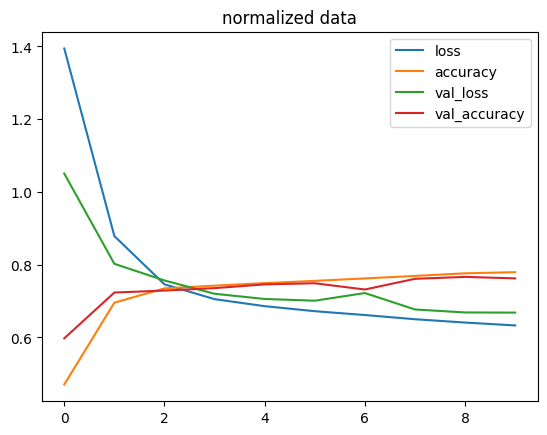

In [20]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_11.history).plot(title="non-normalized data")
#Plot normalized data loss curve
pd.DataFrame(history_12.history).plot(title="normalized data")

In [21]:
tf.random.set_seed(42)

model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

history_13=model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2224 - accuracy: 0.5372 - val_loss: 0.8340 - val_accuracy: 0.7076 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7133 - accuracy: 0.7555 - val_loss: 0.6584 - val_accuracy: 0.7765 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6078 - accuracy: 0.7917 - val_loss: 0.6372 - val_accuracy: 0.7771 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5734 - accuracy: 0.8030 - val_loss: 0.5979 - val_accuracy: 0.7946 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5579 - accuracy: 0.8065 - val_loss: 0.6008 - val_accuracy: 0.7919 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5487 - accuracy: 0.8084 - val_loss: 0.6429 - val_accuracy: 0.7752 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

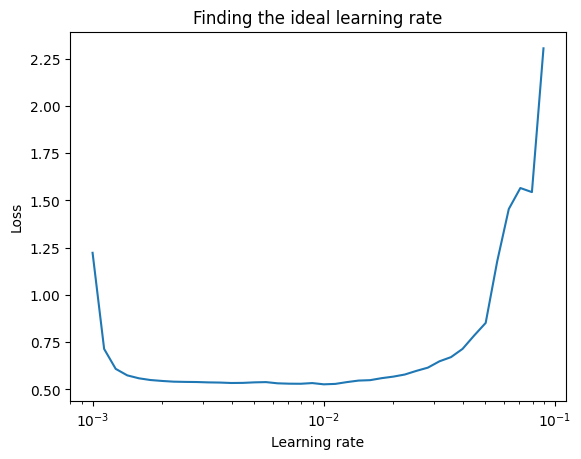

In [22]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [23]:
# Let's fit the model with the ideal learning rate
tf.random.set_seed(42)

model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])


history_14=model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3090 - accuracy: 0.4161 - val_loss: 1.0610 - val_accuracy: 0.5336
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9444 - accuracy: 0.6037 - val_loss: 0.8708 - val_accuracy: 0.6644
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7949 - accuracy: 0.6851 - val_loss: 0.7777 - val_accuracy: 0.6976
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7459 - accuracy: 0.7006 - val_loss: 0.7568 - val_accuracy: 0.6919
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7208 - accuracy: 0.7053 - val_loss: 0.7330 - val_accuracy: 0.7083
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7012 - accuracy: 0.7145 - val_loss: 0.7186 - val_accuracy: 0.7180
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6869 - accuracy: 0.7219 - val_loss: 0.7124 - val_accuracy:

Evaluating our multi-class classification model
To evaluate our multi-class classification model we could:

Evaluate its performance using other classification metrics (such as a confusion metrix)
Asses some of its predictions (through visualizations)
Improving its results ( by training it for longer or by changing its architecture)
Save and export it for use in an application
Let's go to the top 2...

In [24]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):


  # Create a confision matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# Set labels to the classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Set x axis labels on the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color = "white" if cm[i, j] > threshold else "black",
    size = text_size)

In [25]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [26]:
# Makes some predictions with our model
y_probs = model_14.predict(test_data_norm)# probs is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.03036058e-12, 1.46415421e-10, 3.59381941e-10, 1.33497501e-25,
        1.20256143e-08, 3.40203315e-01, 8.24454503e-07, 2.20877584e-02,
        1.34576808e-07, 6.37707949e-01],
       [1.16625706e-04, 3.16289928e-09, 8.85845006e-01, 1.40703702e-03,
        9.60748568e-02, 3.75200608e-12, 1.65077820e-02, 2.77595092e-14,
        4.86612225e-05, 6.57111272e-08],
       [6.18852954e-03, 9.90494788e-01, 3.15839856e-07, 7.10037784e-06,
        1.56748902e-05, 1.14610310e-18, 3.26773198e-03, 4.05002038e-06,
        2.18429395e-05, 9.56745377e-11],
       [1.33864963e-02, 9.80836093e-01, 4.02022465e-07, 1.04531237e-05,
        1.64428930e-05, 3.83394377e-21, 5.73367719e-03, 2.54958508e-07,
        1.61825355e-05, 1.40368932e-11],
       [7.85461739e-02, 2.02562893e-03, 2.13971213e-02, 7.60610938e-01,
        3.62430438e-02, 1.59575342e-13, 9.87953097e-02, 4.44884796e-09,
        2.38179788e-03, 6.32925357e-09]], dtype=float32)

In [27]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [28]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.0303606e-12, 1.4641542e-10, 3.5938194e-10, 1.3349750e-25,
        1.2025614e-08, 3.4020332e-01, 8.2445450e-07, 2.2087758e-02,
        1.3457681e-07, 6.3770795e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [29]:
# Convert all the probabilities into integers
y_pred = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_pred[:10]

array([9, 2, 1, 1, 3, 1, 6, 6, 5, 7])

In [30]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred=y_pred)

array([[766,  24,   8, 149,  13,   2,  24,   0,  14,   0],
       [ 36, 911,   1,  33,   7,   0,   8,   0,   4,   0],
       [ 11,   3, 586,  62, 283,   0,  46,   0,   9,   0],
       [ 31,   7,  16, 864,  26,   1,  45,   0,  10,   0],
       [  0,   1, 213,  68, 559,   0, 128,   0,  31,   0],
       [  0,   0,   0,   0,   1, 911,   1,  30,  11,  46],
       [189,  16,  89, 149, 345,   0, 168,   0,  44,   0],
       [  0,   0,   0,   0,   0,  48,   0, 912,   0,  40],
       [  0,   2,   2,   8,  12,   3,  29,   5, 939,   0],
       [  0,   0,   0,   0,   0,  22,   0,  42,   1, 935]])

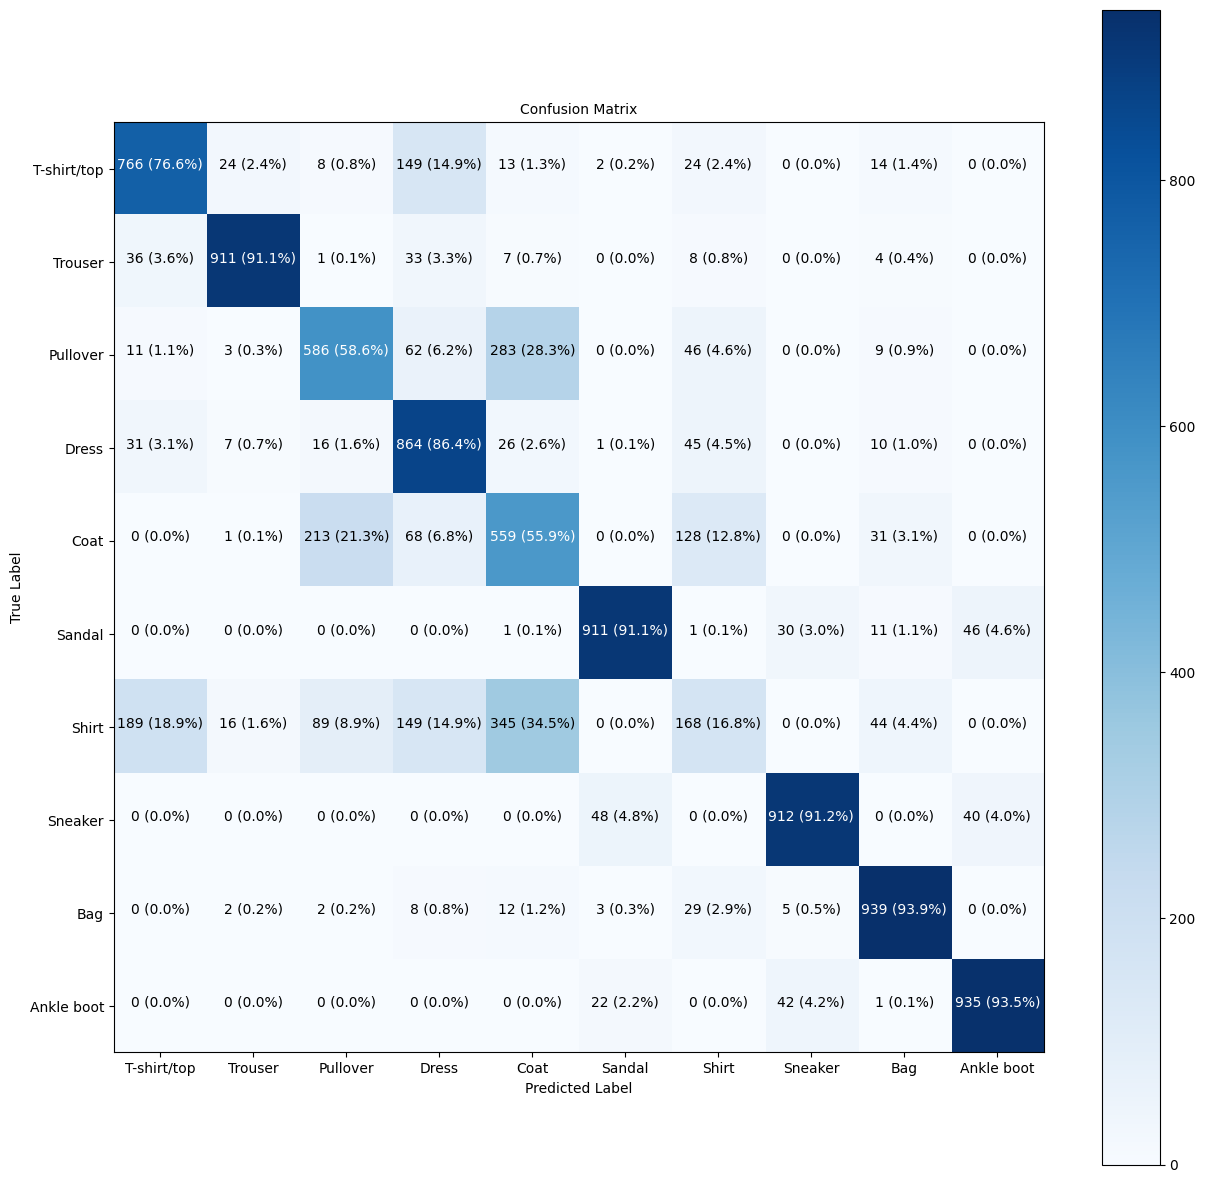

In [32]:
# make a prittier confusion_matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_pred,
                      classes=class_names,
                      figsize = (15, 15),
                      text_size=10)

### Lets create a fun little function

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/ true labels)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color to the green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 14ms/step


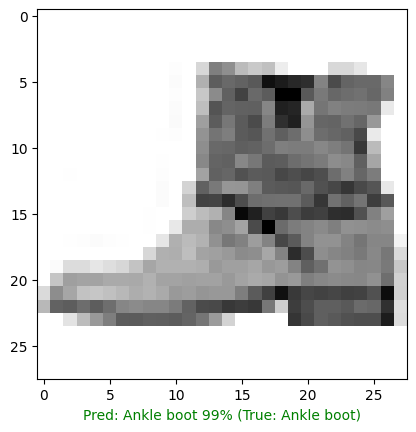

In [34]:
#Check out the random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels = test_labels,
                  classes=class_names)

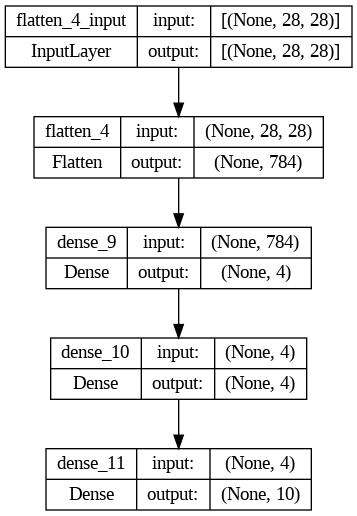

In [35]:
# Let's checkout another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)